In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
sns.set()

# Training metrics

In [60]:
train_columns = ["name", "epoch", "train_loss", "val_loss", "val_acc", "val_auroc"]
train_baseline = ["baseline", 57, 0.249368, 0.279520, 0.886716, 0.863429]
train_03 = ["0.3 drop", 69, 0.289284, 0.292824, 0.883302, 0.846445]
train_05 = ["0.5 drop", 74, 0.312713, 0.311563, 0.877716, 0.815090]
train_concrete = ["concrete drop", 11, 0.255627, 0.288171, 0.887647, 0.852165]
## TODO: add channel-wise models here too
training_metrics = pd.DataFrame(data=[train_baseline, train_03, train_05, train_concrete],
                                columns=train_columns)
training_metrics["name"] = training_metrics["name"].astype("string")

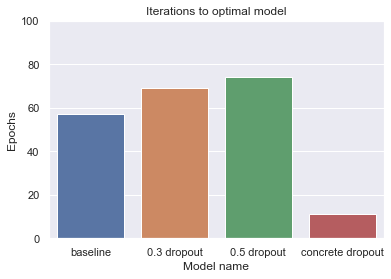

In [86]:
sns.barplot(x="name", y="epoch", data=training_metrics)
plt.xlabel("Model name")
plt.ylabel("Epochs")
plt.ylim(0, 100)
plt.title("Iterations to optimal model")
plt.show()

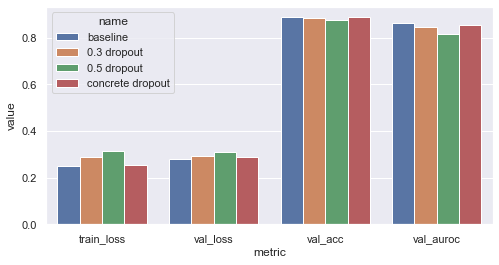

In [103]:
plt.figure(figsize=(8, 4))
training_metrics_melted = pd.melt(training_metrics,
                           id_vars=["name"],
                           value_vars=["train_loss", "val_loss", "val_acc", "val_auroc"],
                           var_name="metric")
sns.barplot(x="metric", y="value", hue="name", data=training_metrics_melted)
plt.show()

# Test metrics

In [83]:
test_columns = ["name", "entr", "acc", "pre_0", "pre_1", "rec_0", "rec_1", "auroc", "auprc", "minpse", "epis", "alea", "uncertainty"]
test_baseline = ["baseline", 0.26587815453112473, 0.8940049409866333, 0.9205342531204224, 0.5643153786659241, 0.9633123874664307, 0.3636363744735718, 0.8539716439272488, 0.4781193222878521, 0.4786096256684492]
test_03 = ["0.3 drop", 0.26438881113908824, 0.8998764157295227, 0.903113067150116, 0.7840909361839294, 0.9933612942695618, 0.18449197709560394, 0.8525758883694512, 0.5099098118943177, 0.47058823529411764, 0.00303400750271976, 0.0835852101445198, 0.08661922067403793]
test_05 = ["0.5 drop", 0.274401043504891, 0.8961681127548218, 0.9029993414878845, 0.686274528503418, 0.9888190031051636, 0.1871657818555832, 0.8386127273474665, 0.4632016589973929, 0.4656084656084656, 0.005050228908658028, 0.08416983485221863, 0.0892200618982315]
test_concrete = ["concrete drop", 0.2669386616446094, 0.8961681127548218, 0.9207195043563843, 0.5811966061592102, 0.965758204460144, 0.3636363744735718, 0.8500852027489098, 0.4863947293394888, 0.4946524064171123, 1.384819062375282e-16, 0.0782242938876152, 0.0782242938876152]
### TODO: add channel-wise metrics here too
test_metrics = pd.DataFrame(data=[test_baseline, test_03, test_05, test_concrete],
                                columns=test_columns)
test_metrics["name"] = test_metrics["name"].astype("string")

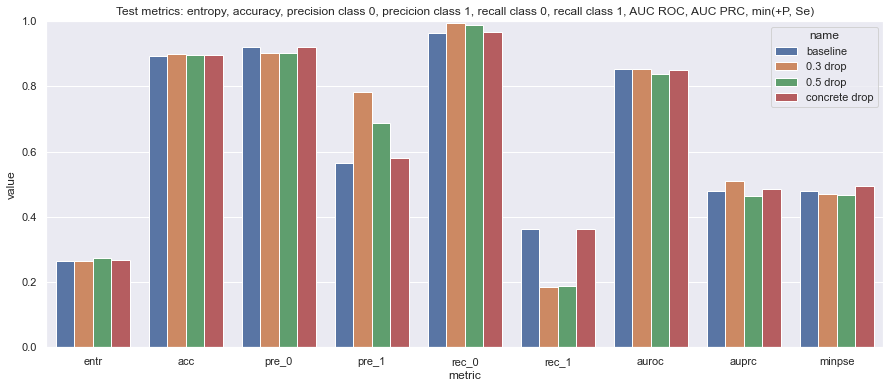

In [102]:
plt.figure(figsize=(15, 6))
test_metrics_melted = pd.melt(test_metrics, id_vars=["name"],
        value_vars=["entr", "acc", "pre_0", "pre_1", "rec_0", "rec_1", "auroc", "auprc", "minpse"],
        var_name="metric")

sns.barplot(x="metric", y="value", data=test_metrics_melted, hue="name")
plt.ylim(0, 1)
plt.title("Test metrics: entropy, accuracy, precision class 0, precicion class 1, recall class 0, recall class 1, AUC ROC, AUC PRC, min(+P, Se)")
plt.show()

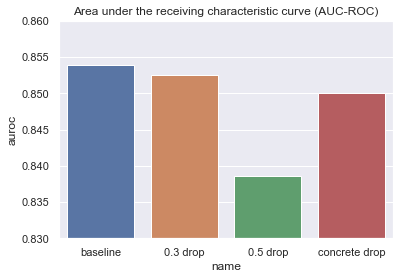

In [116]:
sns.barplot(x="name", y="auroc", data=test_metrics)
plt.ylim(0.83, 0.86)
plt.title("Area under the receiving characteristic curve (AUC-ROC)")
plt.show()

In [114]:
test_metrics[["name", "auroc"]]

,name,auroc
0,baseline,0.853972
1,0.3 drop,0.852576
2,0.5 drop,0.838613
3,concrete drop,0.850085


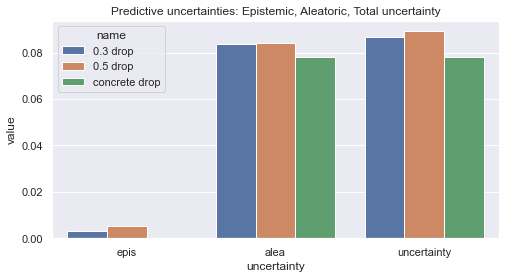

In [97]:
plt.figure(figsize=(8, 4))
uncertainty_metrics = pd.melt(test_metrics[test_metrics["name"] != "baseline"], id_vars=["name"],
        value_vars=["epis", "alea", "uncertainty"],
        var_name="uncertainty")

sns.barplot(x="uncertainty", y="value", hue="name", data=uncertainty_metrics)
plt.title("Predictive uncertainties: Epistemic, Aleatoric, Total uncertainty")
plt.show()

# Partially trained test metrics